In [2]:
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats


In [3]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'

data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
year = pd.read_csv(os.path.join(data_path, 'clean', 'fix_dates.csv'), sep=",")
year = year[['district', 'correct']]
year['distname'] = year.district.str.upper()
year = year [['distname', 'correct']]
data = data.merge(year, left_on = 'distname', right_on = 'distname', how = 'left')
data = data[data.always_eligible == True]
data = data[(data.correct == 2017) | (data.correct == 2016) | (data.doi == False)]
print(len(data[data.year == 'yr1718']))
data.head()
data.to_csv(os.path.join(data_path, 'clean', 'cits.csv'), sep=",")

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,416) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


720


# Explore dates

In [4]:
data['treat'] = np.where((data['doi'] == False), 'control',
                        np.where((data['correct'] == 2016), 'treat1617',
                                np.where((data['correct'] == 2017), 'treat1718', '')))
data[data.year == 'yr1718'].treat.value_counts()


treat1718    486
control      187
treat1617     47
Name: treat, dtype: int64

In [5]:
df = data[(data.treat != 'treat1617')]
df = data.groupby(['year', 'doi'])['avescores'].mean().unstack()
df['years'] = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
df

doi,False,True,years
year,,,
yr1112,-0.307075,-0.041310,2012
yr1213,-0.220411,0.058771,2013
yr1314,-0.115327,0.166085,2014
yr1415,-0.049163,0.202133,2015
yr1516,0.128878,0.370126,2016
yr1617,0.084911,0.363796,2017
yr1718,0.285419,0.502654,2018


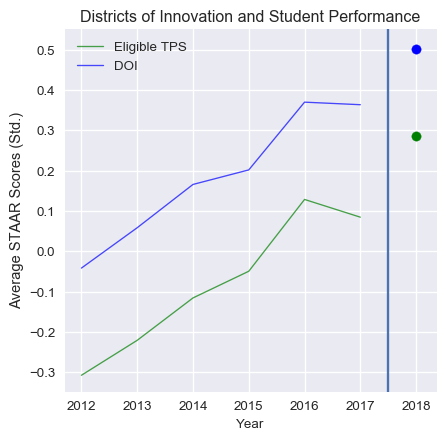

In [6]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


plt.plot(df[df.index != 'yr1718'].years,df[df.index != 'yr1718'][False], marker='', color='green', linewidth=1, alpha=0.7, label = 'Eligible TPS')
plt.plot(df[df.index != 'yr1718'].years,df[df.index != 'yr1718'][True], marker='', color='blue', linewidth=1, alpha=0.7, label = 'DOI')

plt.legend()


plt.scatter(df[df.index == 'yr1718'].years, df[df.index == 'yr1718'][False], color = 'g')
plt.scatter(df[df.index == 'yr1718'].years, df[df.index == 'yr1718'][True], color = 'b')


plt.axvline(x = 2017.5)

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

plt.savefig(table_path + 'CITS.png', bbox_inches="tight")


plt.show()

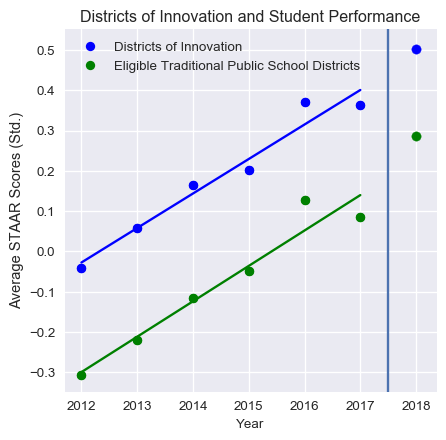

In [7]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

xi = df[df.index != 'yr1718'].years


y_doi = df[df.index != 'yr1718'][True]
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_doi)
line_doi = slope*xi+intercept

plt.plot(xi, y_doi, 'o', color = 'blue', label = "Districts of Innovation")

y_tps = df[df.index != 'yr1718'][False]
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_tps)
line_tps = slope*xi+intercept

plt.plot(xi, y_tps, 'o', color = 'green', label = "Eligible Traditional Public School Districts")


plt.legend()

plt.plot(xi, y_tps, 'o', xi, line_tps, color = 'green')
plt.plot(xi, y_doi, 'o', xi, line_doi, color = 'blue')

#counter factual
#xi = df.years
#y_cf = df[df.index != 'yr1718'][True]
#slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y_tps)

#plt.plot(xi, y_cf, 'o', xi, line_doi, color = 'blue')


plt.scatter(df[df.index == 'yr1718'].years, df[df.index == 'yr1718'][False], color = 'g')
plt.scatter(df[df.index == 'yr1718'].years, df[df.index == 'yr1718'][True], color = 'b')


plt.axvline(x = 2017.5)

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'DID.png', bbox_inches="tight")


plt.show()

In [126]:
df = data.groupby(['year', 'treat'])['avescores'].mean().unstack()
df['years'] = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
df

treat,control,treat1617,treat1718,years
year,,,,
yr1112,-0.307075,0.087776,-0.053865,2012
yr1213,-0.220411,0.184595,0.046578,2013
yr1314,-0.115327,0.303315,0.152786,2014
yr1415,-0.049163,0.347793,0.188047,2015
yr1516,0.128878,0.474394,0.360042,2016
yr1617,0.084911,0.473467,0.353190,2017
yr1718,0.285419,0.616699,0.491626,2018


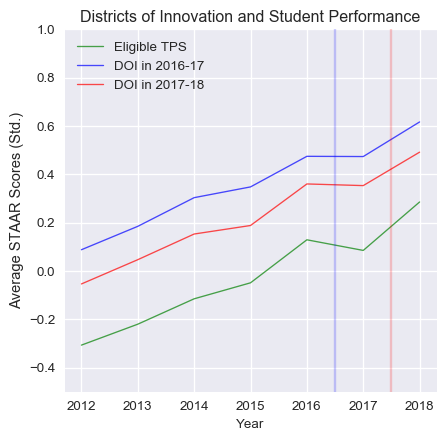

In [127]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

plt.plot(df.years,df['control'], marker='', color='green', linewidth=1, alpha=0.7, label = 'Eligible TPS')
plt.plot(df.years,df['treat1617'], marker='', color='blue', linewidth=1, alpha=0.7, label = 'DOI in 2016-17')
plt.plot(df.years,df['treat1718'], marker='', color='red', linewidth=1, alpha=0.7, label = 'DOI in 2017-18')

plt.axvline(x = 2016.5, color = 'blue', alpha = .2)
plt.axvline(x = 2017.5, color = 'red', alpha = .2)

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')
plt.ylim(-.5, 1)

table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
plt.legend()


plt.savefig(table_path + 'CITS_by_adopters.png', bbox_inches="tight")


plt.show()

# Regression Impacts

### One year impacts for early dois

In [129]:
doi_data = data[data.doi == True]
doi_data = doi_data[doi_data.year < 'yr1718']
doi_data['post'] = np.where((doi_data.year == 'yr1617'), True, False)
doi_data['treat'] = np.where((doi_data.treat == 'treat1617'), True, False)
doi_data['treatpost'] = np.where((doi_data.treat == True) & (doi_data.post == True), True, False)

In [130]:
from sklearn.linear_model import LinearRegression
lr_df = doi_data[['treat', 'post', 'treatpost','avescores']].dropna()
lr = LinearRegression()
lr.fit(X=lr_df[['treat', 'post', 'treatpost']], y=lr_df['avescores'])
lr.coef_


array([ 0.14074542,  0.21436133, -0.02046843])


## DID estimates - 2017-18 DOIS

In [141]:
df = data[data.treat != 'treat1617']
df[df.year == 'yr1718'].doi.value_counts() #treat
df['treat'] = np.where(df.treat == 'treat1617', 1, 0)
df['post'] = np.where((df.year == 'yr1718'), 1, 0) # post
df['treatpost'] = df.doi * df.post
df.treatpost.value_counts() #treat 

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

0    4222
1     486
Name: treatpost, dtype: int64

In [144]:
variables = []
coef = []
se = []
pvalue = []

result = smf.ols(formula='avescores ~ treat + post + treatpost + 1', data=df).fit()
for est in ['treat', 'post', 'treatpost', 'Intercept']:
    coef.append(result.params[est].round(2))
    se.append(result.bse[est].round(2))
    pvalue.append(result.pvalues[est].round(2))
coef

[0.0, 0.18, 0.21, 0.1]